In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from keras.models import Sequential
from keras import layers

In [2]:
df=pd.read_csv('malicious_phish.csv')

print(df.shape)

(651191, 2)


In [3]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [5]:
pd.set_option('display.max_columns', None)

## Feature Extraction

In [6]:
import re
#Checking if the domain contains the IP
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [7]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [8]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0

In [9]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

In [10]:
def count_www(url):
    url.count('www')
    return url.count('www')

In [11]:
def count_atrate(url):

    return url.count('@')

In [12]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

In [13]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

In [14]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [15]:
def count_https(url):
    return url.count('https')

In [16]:
def count_http(url):
    return url.count('http')

In [17]:
def count_per(url):
    return url.count('%')

def count_ques(url):
    return url.count('?')

def count_hyphen(url):
    return url.count('-')

def count_equal(url):
    return url.count('=')

def url_length(url):
    return len(str(url))

def hostname_length(url):
    return len(urlparse(url).netloc)

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [18]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 3.2 MB/s eta 0:00:00


In [19]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1


In [24]:
def GetFeatures(df):

  df_result = pd.DataFrame()
  df_result['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))
  df_result['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
  df_result['google_index'] = df['url'].apply(lambda i: google_index(i))
  df_result['dot_count'] = df['url'].apply(lambda i: count_dot(i))
  df_result['count-www'] = df['url'].apply(lambda i: count_www(i))
  df_result['count@'] = df['url'].apply(lambda i: count_atrate(i))
  df_result['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
  df_result['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
  df_result['short_url'] = df['url'].apply(lambda i: shortening_service(i))
  df_result['count-https'] = df['url'].apply(lambda i : count_https(i))
  df_result['count-http'] = df['url'].apply(lambda i : count_http(i))
  df_result['count%'] = df['url'].apply(lambda i : count_per(i))
  df_result['count?'] = df['url'].apply(lambda i: count_ques(i))
  df_result['count-'] = df['url'].apply(lambda i: count_hyphen(i))
  df_result['count='] = df['url'].apply(lambda i: count_equal(i))
  df_result['url_length'] = df['url'].apply(lambda i: url_length(i))
  df_result['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))
  df_result['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))
  df_result['count-digits']= df['url'].apply(lambda i: digit_count(i))
  df_result['count-letters']= df['url'].apply(lambda i: letter_count(i))
  df_result['fd_length'] = df['url'].apply(lambda i: fd_length(i))
  #df_result['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
  #df_result['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

  return df_result

In [21]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [30]:
df_feature = GetFeatures(df)

In [31]:
df_feature.shape

(651191, 21)

In [32]:
df.shape

(651191, 2)

In [33]:
df_feature.head()

,use_of_ip,abnormal_url,google_index,dot_count,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length
0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,13,0
1,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0,1,29,5
2,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0,1,25,7
3,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0,7,63,9
4,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0,22,199,9


## Target Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_label = pd.DataFrame()
df_label["label"] = lb_make.fit_transform(df["type"])
df_label["label"].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: label, dtype: int64

## Feature Selection

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_feature, df_label, test_size=0.2, random_state=3)

In [ ]:
X_train

In [36]:
X_train.shape

(520952, 21)

In [37]:
y_train.shape

(520952, 1)

In [38]:
time_steps = 5
model = Sequential()
model.add(layers.Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 64)            192       
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 886 (3.46 KB)
Trainable params: 886 (3.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Base Model Epoch 50

In [50]:
model = Sequential()
model.add(layers.Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 20, 64)            192       
                                                                 
 global_max_pooling1d_2 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 886 (3.46 KB)
Trainable params: 886 (3.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8145
Testing Accuracy:  0.8166


In [ ]:
# elapse time: 2 m

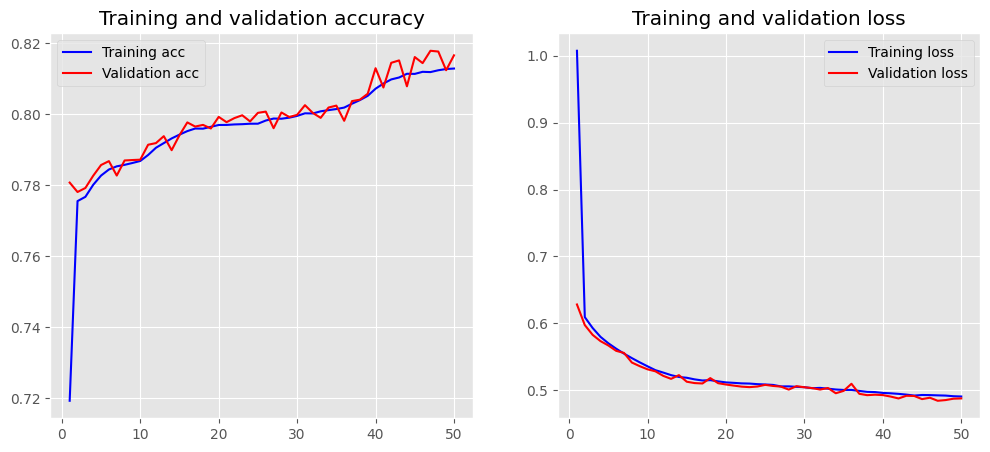

In [52]:
plot_history(history)

In [53]:
# serialize model to JSON
model_json = model.to_json()
with open("base_model_e50_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("base_model_e50_2.h5")

## Base Model Epoch 100

In [54]:
model = Sequential()
model.add(layers.Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 20, 64)            192       
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
Total params: 886 (3.46 KB)
Trainable params: 886 (3.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7909
Testing Accuracy:  0.7929


In [ ]:
# training elapse 5 m

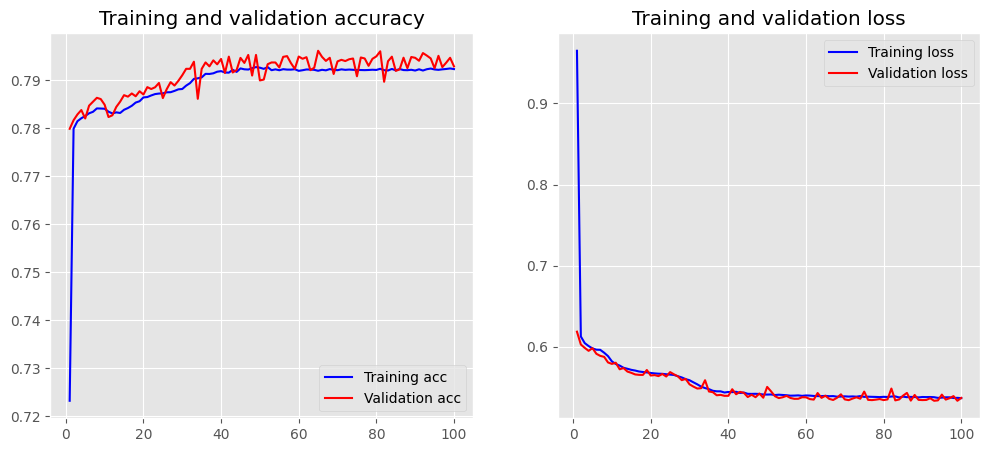

In [56]:
plot_history(history)

In [57]:
# serialize model to JSON
model_json = model.to_json()
with open("base_model_e100.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("base_model_e100.h5")

## Extended Model

In [60]:
model_02 = Sequential()
model_02.add(layers.Conv1D(filters=128, kernel_size=4, padding='same', activation="relu", input_shape=(21,1)))
model_02.add(layers.GlobalMaxPool1D())
model_02.add(layers.Dense(10, activation='relu'))
model_02.add(layers.Dropout(rate=0.1))
model_02.add(layers.Dense(4, activation='softmax'))
model_02.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model_02.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 21, 128)           640       
                                                                 
 global_max_pooling1d_5 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1974 (7.71 KB)
Trainable params: 1974 (7.71 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [61]:
history = model_02.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)

loss, accuracy = model_02.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_02.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8357
Testing Accuracy:  0.8368


In [ ]:
# elapse time: 3m

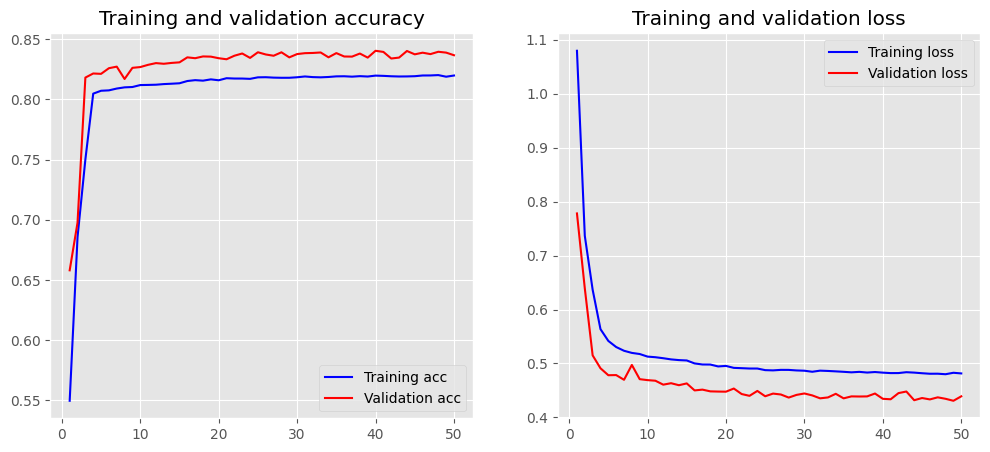

In [62]:
plot_history(history)

In [63]:
# serialize model to JSON
model_json = model.to_json()
with open("model_02_e50.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_02_e50.h5")